# Imports

In [1]:
import cobra
import numpy as np
import pandas as pd
from cobra.flux_analysis import flux_variability_analysis
from cobra.util.solver import linear_reaction_coefficients

from full_ecosystem import Ecosystem
from eco_utils import *
from cobra import Metabolite, Reaction, Model
from cobra.util.array import create_stoichiometric_matrix
from cobra.util.solver import linear_reaction_coefficients
from cobra.flux_analysis import flux_variability_analysis


# _E. coli_ synthetic community example

In this example a synthetic community of two _E. coli_ auxotrophic for different amino acids (leucine and lysine) is constructed to test this method

## _E. coli_ model load

In [2]:
data_dir = ''
model = cobra.io.read_sbml_model("%s%s" % (data_dir, "iAF1260.xml"))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07


In [3]:
model.reactions.BIOMASS_Ec_iAF1260_core_59p81M.reaction

'0.000223 10fthf_c + 0.000223 2ohph_c + 0.5137 ala__L_c + 0.000223 amet_c + 0.2958 arg__L_c + 0.2411 asn__L_c + 0.2411 asp__L_c + 59.984 atp_c + 0.004737 ca2_c + 0.004737 cl_c + 0.000576 coa_c + 0.003158 cobalt2_c + 0.1335 ctp_c + 0.003158 cu2_c + 0.09158 cys__L_c + 0.02617 datp_c + 0.02702 dctp_c + 0.02702 dgtp_c + 0.02617 dttp_c + 0.000223 fad_c + 0.007106 fe2_c + 0.007106 fe3_c + 0.2632 gln__L_c + 0.2632 glu__L_c + 0.6126 gly_c + 0.2151 gtp_c + 54.462 h2o_c + 0.09474 his__L_c + 0.2905 ile__L_c + 0.1776 k_c + 0.01945 kdo2lipid4_e + 0.4505 leu__L_c + 0.3432 lys__L_c + 0.1537 met__L_c + 0.007895 mg2_c + 0.000223 mlthf_c + 0.003158 mn2_c + 0.003158 mobd_c + 0.01389 murein5px4p_p + 0.001831 nad_c + 0.000447 nadp_c + 0.011843 nh4_c + 0.02233 pe160_c + 0.04148 pe160_p + 0.02632 pe161_c + 0.04889 pe161_p + 0.1759 phe__L_c + 0.000223 pheme_c + 0.2211 pro__L_c + 0.000223 pydx5p_c + 0.000223 ribflv_c + 0.2158 ser__L_c + 0.000223 sheme_c + 0.003948 so4_c + 0.000223 thf_c + 0.000223 thmpp_c + 0.

# Construction of auxotrophic _E. coli_ models for 2 member community

In [4]:
exports = ['EX_leu__L_e','EX_lys__L_e'] 

### **ec_minus_lys**: 

_E. coli_ which requires to have lysine supplemented in media or by other member of the community

In [5]:
ec_minus_lys = model.copy()

Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpsgghfo1k.lp
Reading time = 0.03 seconds
: 1668 rows, 4764 columns, 18462 nonzeros


In [6]:
ec_minus_lys.reactions.get_by_id('DAPDC')

Reaction identifier,DAPDC
Name,Diaminopimelate decarboxylase
Memory address,0x7f9432c6d670
Stoichiometry,"26dap__M_c + h_c --> co2_c + lys__L_c Meso-2,6-Diaminoheptanedioate + H+ --> CO2 CO2 + L-Lysine"
GPR,b2838
Lower bound,0.0
Upper bound,999999.0


In [7]:
ec_minus_lys_bound_modifications = {'DAPDC':(0,0),
                            'EX_lys__L_e' : (-1000,1000),
                                   } 
for rid in ec_minus_lys_bound_modifications:
    r = ec_minus_lys.reactions.get_by_id(rid)
    r.bounds = ec_minus_lys_bound_modifications[rid]

Check lysine requirement

In [8]:
ec_minus_lys.slim_optimize()

0.7678945589305766

In [9]:
flux_variability_analysis(ec_minus_lys, exports, fraction_of_optimum=0.1)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpctdqbiiz.lp
Reading time = 0.03 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpdvv_gf_s.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpq8f2epcm.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpce8n81lu.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 

,minimum,maximum
EX_leu__L_e,0.0,5.461462
EX_lys__L_e,-1000.0,-0.026354


### **ec_minus_leu**:


_E. coli_ requires Leucine due to knockout on IPPS (2-isopropylmalate synthase) reaction

In [10]:
ec_minus_leu = model.copy()

Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmppsdqu7e8.lp
Reading time = 0.04 seconds
: 1668 rows, 4764 columns, 18462 nonzeros


In [11]:
ec_minus_leu.reactions.get_by_id('IPPS')

Reaction identifier,IPPS
Name,2-isopropylmalate synthase
Memory address,0x7f94362c3730
Stoichiometry,3mob_c + accoa_c + h2o_c --> 3c3hmp_c + coa_c + h_c 3-Methyl-2-oxobutanoate + Acetyl-CoA + H2O H2O --> 3-Carboxy-3-hydroxy-4-methylpentanoate + Coenzyme A + H+
GPR,b0074
Lower bound,0.0
Upper bound,999999.0


In [12]:
ec_minus_leu_bound_modifications = {'IPPS':(0,0),
                            'EX_leu__L_e' : (-1000,1000),
                                   } 
for rid in ec_minus_leu_bound_modifications:
    r = ec_minus_leu.reactions.get_by_id(rid)
    r.bounds = ec_minus_leu_bound_modifications[rid]

Check leucine requirement

In [13]:
ec_minus_leu.slim_optimize()

0.7763435343183095

In [14]:
flux_variability_analysis(ec_minus_leu, exports, fraction_of_optimum=0.1)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp81c1cdm1.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpj7r63dqh.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpboukv_3k.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 columns, 18465 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpvf4z05p0.lp
Reading time = 0.02 seconds
: 1669 rows, 4765 

,minimum,maximum
EX_leu__L_e,-0.349743,-0.034974
EX_lys__L_e,0.000000,5.492299


## Store individual models and generate ecosystem object

In [15]:
member_models = { 'ec_minus_lys':ec_minus_lys,
                  'ec_minus_leu':ec_minus_leu         
                 }

for model_id in member_models:
    filename = "%s.xml" % (model_id)
    member_model = member_models[model_id]
    cobra.io.write_sbml_model(member_model, filename)
    print('model %s stored' % model_id)

model ec_minus_lys stored
model ec_minus_leu stored


In [16]:
member_models = [ec_minus_lys, ec_minus_leu]

In [17]:
eco2 = Ecosystem(models = member_models, prefixes=['eco_lys', 'eco_leu'], 
                     community_name = 'eco2', community_id = 'eco2', solver='gurobi')

0. Copying member models ...
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpukwgocjo.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp9g6mol3u.lp
Reading time = 0.02 seconds
: 1668 rows, 4764 columns, 18462 nonzeros
1. Storing exchanged metabolites information ...
2. Updating member model objects ids ...
3. Storing member objectives ...
4. Merging member models ...
{'eco_lys_BIOMASS_Ec_iAF1260_core_59p81M': 1.0}
{'eco_leu_BIOMASS_Ec_iAF1260_core_59p81M': 1.0}
5. Creating pool compartment, metabolites and reactions ...
6. Updating compartment names ...
Done. Community model created
Created community model from 2 member models:
General stats:
model (0):
	 id = iAF1260, name =  , prefix= eco_lys
		 reactions = 2382
		 exchange metabolites = 304
		 compartments = 3
model (1):
	 id = iAF1260, name =  , prefix= eco_leu
		 reactions = 2382
		 exchange 

### Set bounds simulation

From Zhang et al., (2014), uptake of single cultured strains (Table 1):
- dlysA: 0.161 mmol/gDW/h
- dleuA: 0.220 mmol/gDW/h

Table S1: glc uptake rate by the community: 6.025 mmol/gDW/h.

Scenarios defined in this work:
- sim_glc_cons_AA_prod_no_AA: constrained glucose entry (-10), as well as biological constraint of 10. No leucine or lysine supplementation
- sim_glc_cons_AA_prod_001_AA: same conditions of previous scenario but supplementation of 0.01 of leucine and lysine

In [18]:
case = 'sim_glc_cons_AA_prod_no_AA'
eco2.set_pool_bounds({'glc__D_e':(-10,1000)}, bioCons = -10)
eco2.set_pool_bounds({'lys__L_e':(0,1000)}, bioCons = -0.161)
eco2.set_pool_bounds({'leu__L_e':(0,1000)}, bioCons = -0.22)
eco2.set_pool_bounds({'o2_e':(-15,1000)}, bioCons = -15)

eco2.cmodel.reactions.eco_leu_EX_lys__L_e.upper_bound = 0.2
eco2.cmodel.reactions.eco_lys_EX_leu__L_e.upper_bound = 0.2

In [19]:
eco2.cmodel.optimize()

,fluxes,reduced_costs
eco_lys_ACGAM1PPpp,0.0,0.000000
eco_lys_2AGPA140tipp,0.0,0.000000
eco_lys_EX_acser_e,0.0,-0.066267
eco_lys_2AGPA141tipp,0.0,0.000000
eco_lys_2AGPA160tipp,0.0,0.000000
...,...,...
EX_lys__L_e,0.0,-0.132534
EX_lyx__L_e,0.0,-0.000000
EX_mal__D_e,0.0,-0.000000
EX_mal__L_e,0.0,-0.000000


In [20]:
eco2.cmodel.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e_pool,EX_ca2_e,0.003336,0,0.00%
cl_e_pool,EX_cl_e,0.003336,0,0.00%
cobalt2_e_pool,EX_cobalt2_e,0.002224,0,0.00%
cu2_e_pool,EX_cu2_e,0.002224,0,0.00%
fe2_e_pool,EX_fe2_e,0.005318,0,0.00%
fe3_e_pool,EX_fe3_e,0.005004,0,0.00%
glc__D_e_pool,EX_glc__D_e,10,6,100.00%
k_e_pool,EX_k_e,0.1251,0,0.00%
mg2_e_pool,EX_mg2_e,0.00556,0,0.00%
mn2_e_pool,EX_mn2_e,0.002224,0,0.00%


In [21]:
eco2.set_cluster_reactions()

Missing FCA results
Using non-blocked reactions only
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpq_3m1olk.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp_iixguk8.lp
Reading time = 0.14 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpqkbl6q0m.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp7a

### Compute grid

In [44]:
eco2.build_grid(numPoints = 10, expand = True, drop_zero=True, ignore_maint = True)

Maximum community:0.8575949100130487
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.09528832 0.19057665 0.28586497 0.38115329 0.47644162
 0.57172994 0.66701826 0.76230659 0.85759491]
[[[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
   0.66666667 0.77777778 0.88888889 1.        ]
  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
   0.66666667 0.77777778 0.88888889 1.        ]
  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
   0.66666667 0.77777778 0.88888889 1.        ]
  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
   0.66666667 0.77777778 0.88888889 1.        ]
  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
   0.66666667 0.77777778 0.88888889 1.        ]
  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
   0.66666667 0.77777778 0.88888889 1.        ]
  [0.         0.11111111 0.22222222

In [45]:
eco2.get_member_reactions()
eco2.get_points_distribution()

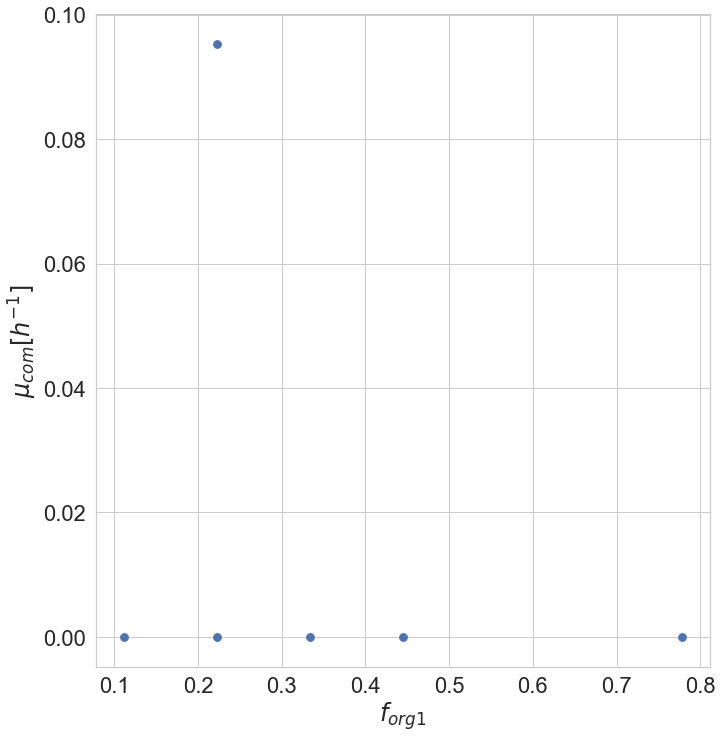

In [46]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

eco2.plot_2D_slice(prefixes=[], fixed_values=[], parent_cmap='tab20',s=60, figsize=(11,12), 
                         to_plot = None, show_edge=False,frac_prefix= None,
                            xlabel = '$f_{org1}$',
                            ylabel ='$\mu_{com}[h^{-1}]$', saveFile = 'grid')

In [47]:
eco2.analyze_grid()

[0.11111111 0.        ]
updating reaction bounds ...
[0.22222222 0.        ]
updating reaction bounds ...
[0.33333333 0.        ]
updating reaction bounds ...
[0.44444444 0.        ]
updating reaction bounds ...
[0.55555556 0.        ]
updating reaction bounds ...
[0.66666667 0.        ]
updating reaction bounds ...
[0.77777778 0.        ]
updating reaction bounds ...
[0.88888889 0.        ]
updating reaction bounds ...
[1. 0.]
updating reaction bounds ...
[0.         0.09528832]
updating reaction bounds ...
unfeasible point
[0.11111111 0.09528832]
updating reaction bounds ...
unfeasible point
[0.22222222 0.09528832]
updating reaction bounds ...
[0.33333333 0.09528832]
updating reaction bounds ...
[0.44444444 0.09528832]
updating reaction bounds ...
[0.55555556 0.09528832]
updating reaction bounds ...
[0.66666667 0.09528832]
updating reaction bounds ...
[0.77777778 0.09528832]
updating reaction bounds ...
[0.88888889 0.09528832]
updating reaction bounds ...
unfeasible point
[1.        

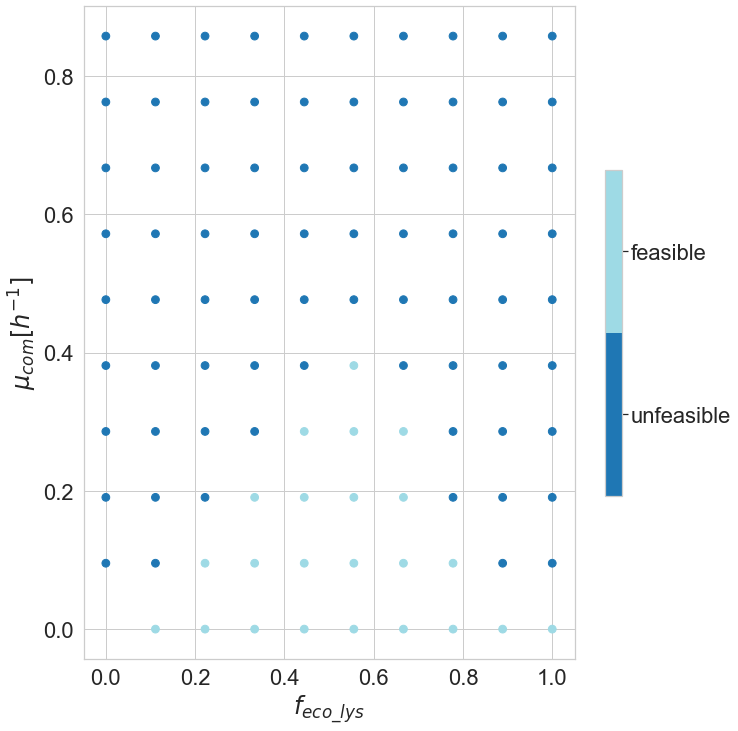

In [48]:
eco2.plot_2D_slice(prefixes=[], fixed_values=[], parent_cmap='tab20',s=60, figsize=(11,12), 
                         to_plot = 'feasible', show_edge=False,frac_prefix= None,
                            xlabel = '$f_{eco\_lys}$',
                            ylabel ='$\mu_{com}[h^{-1}]$', saveFile = 'grid')

In [49]:
eco2.objectives

[{'eco_lys_BIOMASS_Ec_iAF1260_core_59p81M': 1.0},
 {'eco_leu_BIOMASS_Ec_iAF1260_core_59p81M': 1.0}]

Qualitative Flux Balance Analysis (FVA) can be performed on the grid, a modification of the rxn2Cluster parameter can be performed to only include Exchange reactions, as follows (in commented code)

In [50]:
#oldRxn2Cluster = eco2_model.rxn2cluster
#newRxn2Cluster = [r for r in oldRxn2Cluster if 'EX_' in r] #all exchanges
#eco2_model.rxn2cluster = newRxn2Cluster
eco2.analyze_grid(analysis = 'qual_fva', update_bounds=True)

Running qualitative fva over grid feasible points...
[0.11111111 0.        ]
updating reaction bounds ...
running FVA on grid point...
(array([0.11111111, 0.        ]), array([0.11111111, 0.88888889]))
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpucoezdoo.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpx91t_kow.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp6q6jviip.lp
Reading time = 0.07 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Acad

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp579n5_v4.lp
Reading time = 0.04 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
translating to qualitative vector..
[0.66666667 0.        ]
updating reaction bounds ...
running FVA on grid point...
(array([0.66666667, 0.        ]), array([0.66666667, 0.33333333]))
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmplgk00_ei.lp
Reading time = 0.06 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpi8rk4qxx.lp
Reading time = 0.06 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - fo

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpjakttfa_.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpmvc2utey.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
translating to qualitative vector..
[0.33333333 0.09528832]
updating reaction bounds ...
running FVA on grid point...
(array([0.33333333, 0.09528832]), array([0.33333333, 0.66666667]))
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp07brtrup.lp
Reading time = 0.04 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - fo

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp7wglfkwy.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpzkjyjxmn.lp
Reading time = 0.06 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpuq00nmhw.lp
Reading time = 0.06 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
translating to qualitative vector..
[0.33333333 0.19057665]
updating reaction bounds ...
running FVA on grid point...
(array([0.33333333, 0.19057665]), array([0.33333333, 0.66666667]))
Set parameter Username
Academic license - fo

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpvzihs32u.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmp0crx72cz.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpne6r99ss.lp
Reading time = 0.05 seconds
: 3641 rows, 10137 columns, 38753 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpkynrqfwv.lp
Reading time = 0.05 seconds
: 3641 rows, 10

In [51]:
eco2.qual_vector_df.head()

,EX_12ppd__R_e,EX_15dap_e,EX_4abut_e,EX_4hba_c,EX_5dglcn_e,EX_5drib_c,EX_LalaDgluMdapDala_e,EX_LalaDgluMdap_e,EX_ac_e,EX_acald_e,...,eco_lys_XPPT,eco_lys_XTSNH,eco_lys_XTSNt2rpp,eco_lys_XTSNtex,eco_lys_XYLI2,eco_lys_ZN2abcpp,eco_lys_ZN2t3pp,eco_lys_ZN2tpp,eco_lys_ZNabcpp,eco_lys_Zn2tex
0,1,1,1,0,1,1,1,1,1,1,...,1,1,-1,-1,4,1,1,1,1,0
1,1,1,1,0,1,1,1,1,1,1,...,1,1,-1,-1,4,1,1,1,1,0
2,1,1,1,0,1,1,1,1,1,1,...,1,1,-1,-1,4,1,1,1,1,0
3,1,1,1,0,1,1,1,1,1,1,...,1,1,-1,-1,4,1,1,1,1,0
4,1,1,1,0,1,1,1,1,1,1,...,1,1,-1,-1,4,1,1,1,1,0


## Clustering
Parameters for function **clusterPoints**:
- **method**: method used for clustering. Default: *hierarchical* clustering with Jaccard distance.
- **numeric_delta**: difference between flux values accepted as zero(default: 1e-4).
- **k**: number of clusters to be obbtained (default: 20).

In [52]:
eco2.clusterPoints('hierarchical', k = 8)

Calculating jaccard distances between grid points...
Clustering grid points ...
Done!


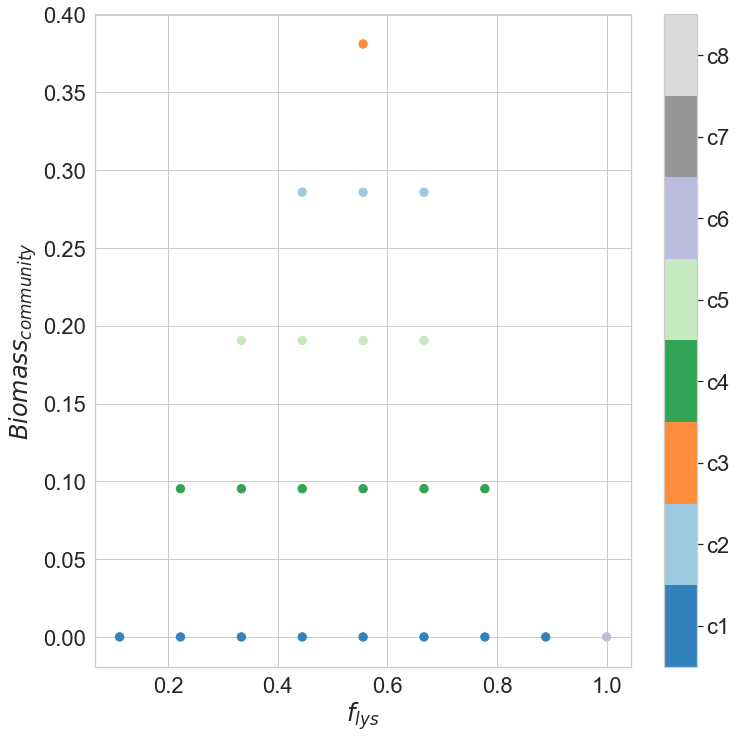

In [53]:
eco2.plot_2D_slice(prefixes=[], fixed_values=[], parent_cmap='tab20c',s=70, figsize=(12,12), 
                         to_plot = 'cluster', show_edge=False,frac_prefix= None,
                            xlabel = '$f_{lys}$',
                            ylabel ='$Biomass_{community}$')

Qualitative changes in this system are associated with increased biomass production and changes in community composition. For instance structural plasticity (-0) of organism 1 is gradually replaced by flux plasticity (--) while increasing biomass requirements.

To search for reactions that change their qualitative values between two clusters:

**1. Select representative values for each reaction on each cluster**:

The function **get_cluster_reaction_values** gives a DataFrame where each column is a cluster and each row a reaction. For each reaction it stores its representative value (for each cluster), in other words a qualitative vaues that represts over a threshold fraction of the points of the cluster. If there are no enough points in a cluster where a certain qualitative state is exhibited the cell is filled with a *NaN* value.
    
Parameters of **get_cluster_reaction_values**:
- **thr**:  Minimum fraction of cluster points where a reaction should have the same qualitative state to be considered representative (default value: 0.75) 
- **changing**: Fill the DataFrame only with reactions which representative values are different in at least 2 clusters (default: True).
    
**2. Select reactions with qualitative representative values between two clusters:**    
  
The function **compare_clusters** gives a DataFrame with reactions and their status that change between two specific clusters.

Parameters **get_cluster_reactions**:
- **cluster_df**: DataFrame generated by  **get_cluster_reaction_values**
- **cid1, cid2**: Ids of clusters to be compared


In [54]:
df = eco2.get_cluster_reaction_values(thr=0.8, changing= True)

/Users/administrador/Library/Mobile Documents/com~apple~CloudDocs/work/ecosystem/full_ecosystem.py:1419: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  aux = [ df.apply(get_rep_vals, thr=thr) for df in cluster_dfs]


In [55]:
df = eco2.get_cluster_reaction_values(thr=0.8, changing= True)
cat_dict = {-3.0: '-', -2.0: '--',-1.0: '-0',1.0: '0+',0.0: '0',2.0: '++',3.0: '+',4.0: '-+',5.0: 'err',100.0: 'var'}
df = df.replace(cat_dict)
df

/Users/administrador/Library/Mobile Documents/com~apple~CloudDocs/work/ecosystem/full_ecosystem.py:1419: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  aux = [ df.apply(get_rep_vals, thr=thr) for df in cluster_dfs]


,c1,c2,c3,c4,c5,c6,c7,c8
EX_12ppd__R_e,0+,0+,0+,0+,0+,0+,NaN,NaN
EX_15dap_e,0+,0+,0+,0+,0+,0,NaN,NaN
EX_4abut_e,0+,0+,0+,0+,0+,0+,NaN,NaN
EX_4hba_c,0,+,+,+,+,0,NaN,NaN
EX_5dglcn_e,0+,0+,0+,0+,0+,0+,NaN,NaN
...,...,...,...,...,...,...,...,...
eco_lys_ZN2abcpp,0+,0+,0+,0+,0+,0+,NaN,NaN
eco_lys_ZN2t3pp,0+,0+,0+,0+,0+,0+,NaN,NaN
eco_lys_ZN2tpp,0+,0+,0+,0+,0+,0+,NaN,NaN
eco_lys_ZNabcpp,0+,0+,0+,0+,0+,0+,NaN,NaN


For example, if we want to compare what are cualitative changes that occur between shifting from one cluster to another (cluster 3 and cluster 4):

In [56]:
df_comp = eco2.compare_clusters(df, 'c3','c4')

df_comp

,c3,c4
EX_h2o_e,++,-+
EX_o2_e,--,-0
eco_leu_ATPS4rpp,++,-+
eco_leu_EX_h2o_e,++,-+
eco_leu_EX_o2_e,--,-0
eco_leu_H2Otex,--,-+
eco_leu_H2Otpp,--,-+
eco_leu_O2tex,++,0+
eco_leu_O2tpp,++,0+
eco_leu_RPI,--,-+


# Functional relationship analysis

In [57]:
grid_x = [0.3, 0.5, 0.7]
grid_y = reversed([0.1, 0.2])
rxns_analysis = ['eco_lys_EX_lys__L_e', 'eco_leu_EX_lys__L_e']
eco2.quan_FCA(grid_x, grid_y, rxns_analysis)

Quantitative Flux Coupling analysis 
 Initializing grid...
the closest point to [0.3, 0.2] is [0.33333333 0.19057665], at a distance of 0.03463972717994912
the closest point to [0.5, 0.2] is [0.44444444 0.19057665], at a distance of 0.05634908465163048
the closest point to [0.7, 0.2] is [0.66666667 0.19057665], at a distance of 0.03463972717994912
the closest point to [0.3, 0.1] is [0.33333333 0.09528832], at a distance of 0.03366468488057863
the closest point to [0.5, 0.1] is [0.44444444 0.09528832], at a distance of 0.05575499663782585
the closest point to [0.7, 0.1] is [0.66666667 0.09528832], at a distance of 0.03366468488057863
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpyuzumkjr.lp
Reading time = 0.04 seconds
: 3640 rows, 10136 columns, 38748 nonzeros
Read LP format model from file /var/folders/fr/z1hdfpn55130hyr53bbb_1_40000gn/T/tmpnx5i7p49.lp
Reading time = 0.03 seconds
: 1668 rows, 4764 columns, 18462 nonzeros
Read LP format model from fi

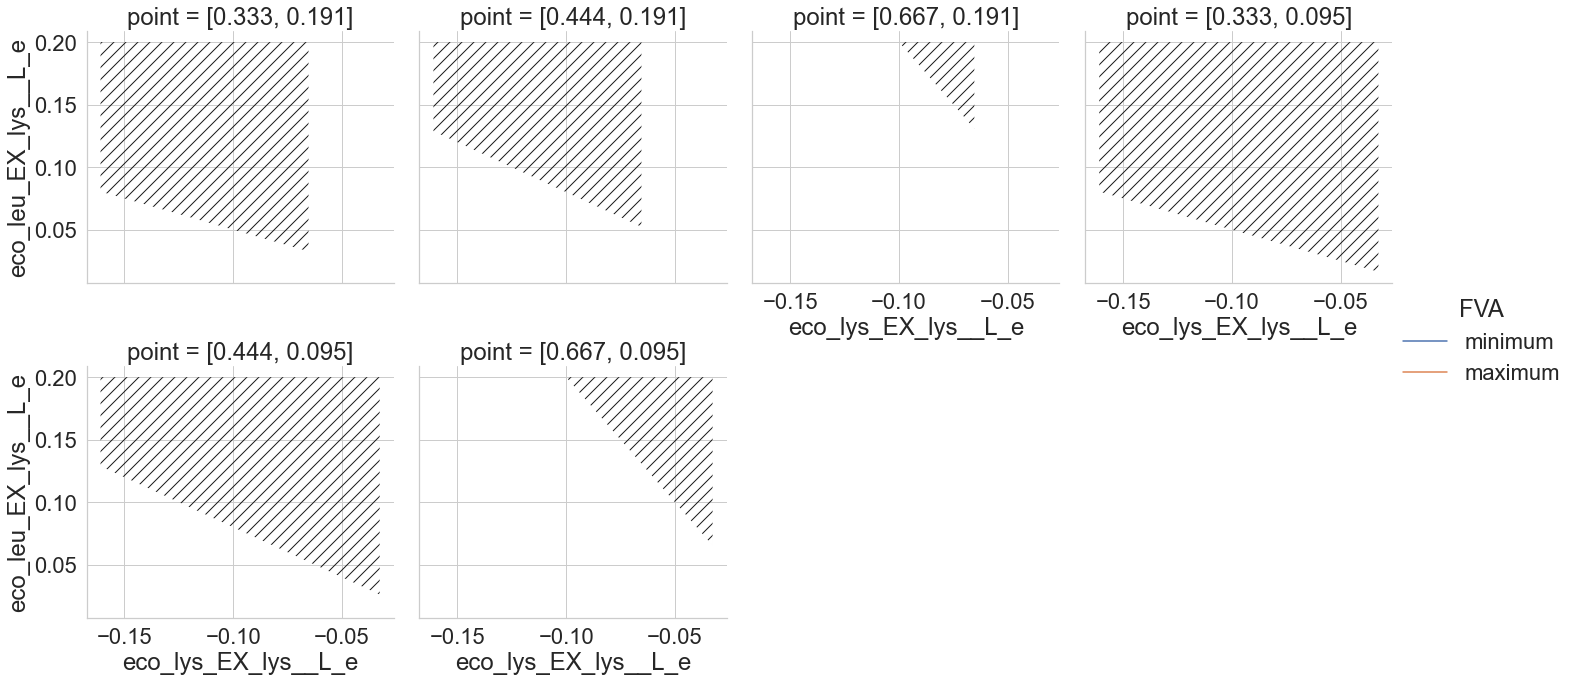

In [58]:
eco2.plot_qFCA()